<a href="https://colab.research.google.com/github/rlagusgh0223/Data/blob/main/%EB%A7%88%EC%BC%80%ED%8C%85_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EC%A7%80%ED%91%9C_%EC%A0%95%EC%9D%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA : 탐색적 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

파일 불러오기

In [2]:
ad = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬/eda_ad.csv의 사본')
order = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬/eda_order.csv의 사본')
product = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬/eda_product.csv의 사본')
purchase = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬/eda_purchase.csv의 사본')
visit = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬/eda_visit.csv의 사본')

In [3]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        5000 non-null   float64
 1   user_id         5000 non-null   float64
 2   product_id      5000 non-null   float64
 3   order_date      5000 non-null   object 
 4   quantity        5000 non-null   float64
 5   discount_ratio  5000 non-null   float64
 6   pay_date        3738 non-null   object 
dtypes: float64(5), object(2)
memory usage: 273.6+ KB


In [4]:
order['order_date'] = pd.to_datetime(order.order_date)
order.head()

,order_id,user_id,product_id,order_date,quantity,discount_ratio,pay_date
0,1.0,960.0,17.0,2023-02-07,6.0,0.004746,2023-02-09
1,6.0,1447.0,6.0,2023-01-12,6.0,0.008240,2023-01-14
2,14.0,1325.0,17.0,2023-02-15,6.0,0.039391,NaN
3,17.0,102.0,1.0,2023-02-20,6.0,0.007944,2023-02-26
4,38.0,94.0,8.0,2023-02-11,6.0,0.014037,2023-02-13


In [5]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      50000 non-null  object 
 1   campaign  50000 non-null  object 
 2   source    50000 non-null  object 
 3   spending  50000 non-null  float64
 4   clicks    50000 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


In [6]:
ad['date'] = pd.to_datetime(ad.date)
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      50000 non-null  datetime64[ns]
 1   campaign  50000 non-null  object        
 2   source    50000 non-null  object        
 3   spending  50000 non-null  float64       
 4   clicks    50000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.9+ MB


In [7]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    4500 non-null   float64
 1   order_id   4500 non-null   float64
 2   timestamp  4500 non-null   object 
dtypes: float64(2), object(1)
memory usage: 105.6+ KB


In [8]:
purchase['timestamp'] = pd.to_datetime(purchase.timestamp)
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    4500 non-null   float64       
 1   order_id   4500 non-null   float64       
 2   timestamp  4500 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 105.6 KB


In [9]:
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    2219 non-null   float64
 1   source     1125 non-null   object 
 2   campaign   1125 non-null   object 
 3   timestamp  2219 non-null   object 
dtypes: float64(1), object(3)
memory usage: 69.5+ KB


In [10]:
visit['timestamp'] = pd.to_datetime(visit.timestamp)
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    2219 non-null   float64       
 1   source     1125 non-null   object        
 2   campaign   1125 non-null   object        
 3   timestamp  2219 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 69.5+ KB


전처리

In [11]:
order.head()

,order_id,user_id,product_id,order_date,quantity,discount_ratio,pay_date
0,1.0,960.0,17.0,2023-02-07,6.0,0.004746,2023-02-09
1,6.0,1447.0,6.0,2023-01-12,6.0,0.008240,2023-01-14
2,14.0,1325.0,17.0,2023-02-15,6.0,0.039391,NaN
3,17.0,102.0,1.0,2023-02-20,6.0,0.007944,2023-02-26
4,38.0,94.0,8.0,2023-02-11,6.0,0.014037,2023-02-13


In [12]:
product.head()

,id,category,cost,price
0,1,b,23,48
1,2,e,19,40
2,3,a,17,35
3,4,b,32,56
4,5,a,11,25


In [13]:
order_mg = pd.merge(order, product, how='left', left_on='product_id', right_on='id')

In [14]:
# 필요한 컬럼 만들기
# total_cost, total_profit
order_mg['total_revenue'] = order_mg.price * order_mg.quantity
order_mg['total_disc_amt'] = order_mg.total_revenue * order_mg.discount_ratio
order_mg['total_cost'] = order_mg.cost * order_mg.quantity
order_mg['total_profit'] = order_mg.total_revenue - order_mg.total_cost - order_mg.total_disc_amt
order_mg.head()

,order_id,user_id,product_id,order_date,quantity,discount_ratio,pay_date,id,category,cost,price,total_revenue,total_disc_amt,total_cost,total_profit
0,1.0,960.0,17.0,2023-02-07,6.0,0.004746,2023-02-09,17,b,13,21,126.0,0.598023,78.0,47.401977
1,6.0,1447.0,6.0,2023-01-12,6.0,0.008240,2023-01-14,6,a,10,33,198.0,1.631487,60.0,136.368513
2,14.0,1325.0,17.0,2023-02-15,6.0,0.039391,NaN,17,b,13,21,126.0,4.963298,78.0,43.036702
3,17.0,102.0,1.0,2023-02-20,6.0,0.007944,2023-02-26,1,b,23,48,288.0,2.287944,138.0,147.712056
4,38.0,94.0,8.0,2023-02-11,6.0,0.014037,2023-02-13,8,b,18,23,138.0,1.937102,108.0,28.062898


attribution

In [26]:
visit_nn = ~visit.campaign.isna()
visit = visit[visit_nn]

In [27]:
log_mg = pd.merge(purchase, visit, how='cross')

In [28]:
log_mg.head()

,user_id_x,order_id,timestamp_x,user_id_y,source,campaign,timestamp_y
0,960.0,1.0,2023-02-07 18:13:21,1017.0,b,campaign_8,2023-02-08 13:10:49.026771200
1,960.0,1.0,2023-02-07 18:13:21,1398.0,b,campaign_6,2023-01-07 06:37:27.756224000
2,960.0,1.0,2023-02-07 18:13:21,707.0,b,campaign_5,2023-01-21 10:51:52.800867200
3,960.0,1.0,2023-02-07 18:13:21,1285.0,a,campaign_3,2023-01-06 11:49:36.565366400
4,960.0,1.0,2023-02-07 18:13:21,529.0,b,campaign_7,2023-01-28 12:51:38.503680000


In [29]:
log_mg.rename(
    columns = {
        'user_id_x' : 'user_id_purc',
        'user_id_y' : 'user_id_visit',
        'timestamp_x' : 'purc_at',
        'timestamp_y' : 'visit_at'
    }, inplace = True
)

In [30]:
log_mg

,user_id_purc,order_id,purc_at,user_id_visit,source,campaign,visit_at
0,960.0,1.0,2023-02-07 18:13:21,1017.0,b,campaign_8,2023-02-08 13:10:49.026771200
1,960.0,1.0,2023-02-07 18:13:21,1398.0,b,campaign_6,2023-01-07 06:37:27.756224000
2,960.0,1.0,2023-02-07 18:13:21,707.0,b,campaign_5,2023-01-21 10:51:52.800867200
3,960.0,1.0,2023-02-07 18:13:21,1285.0,a,campaign_3,2023-01-06 11:49:36.565366400
4,960.0,1.0,2023-02-07 18:13:21,529.0,b,campaign_7,2023-01-28 12:51:38.503680000
...,...,...,...,...,...,...,...
5062495,926.0,4808.0,2023-02-25 11:22:04,869.0,b,campaign_10,2022-12-29 07:21:02.435923200
5062496,926.0,4808.0,2023-02-25 11:22:04,979.0,b,campaign_9,2022-11-28 08:55:33.216025600
5062497,926.0,4808.0,2023-02-25 11:22:04,979.0,b,campaign_6,2023-04-12 08:34:58.723929600
5062498,926.0,4808.0,2023-02-25 11:22:04,979.0,b,campaign_4,2023-01-19 09:58:04.480480000


In [31]:
same_user = log_mg.user_id_purc == log_mg.user_id_visit
same_user

0          False
1          False
2          False
3          False
4          False
           ...  
5062495    False
5062496    False
5062497    False
5062498    False
5062499    False
Length: 5062500, dtype: bool

In [32]:
time_filter = log_mg.purc_at >= log_mg.visit_at

In [33]:
log_mg['td_day'] = (log_mg.purc_at - log_mg.visit_at).dt.total_seconds() / (3600*24)

In [34]:
attr_w = log_mg.td_day <= 70  # 70일 이내 방문만 유효

In [35]:
log = log_mg[same_user & time_filter & attr_w]

In [37]:
log.reset_index(drop = True, inplace=True)
log

,user_id_purc,order_id,purc_at,user_id_visit,source,campaign,visit_at,td_day
0,1447.0,6.0,2023-01-12 13:51:32,1447.0,a,campaign_2,2022-12-29 01:13:29.584790400,14.526417
1,1447.0,6.0,2023-01-12 13:51:32,1447.0,b,campaign_6,2022-11-16 08:58:07.100316800,57.203760
2,1447.0,6.0,2023-01-12 13:51:32,1447.0,b,campaign_10,2022-12-11 11:44:34.229184000,32.088169
3,102.0,17.0,2023-02-20 12:00:16,102.0,a,campaign_2,2023-02-19 19:38:15.295360000,0.681953
4,102.0,17.0,2023-02-20 12:00:16,102.0,b,campaign_5,2023-02-02 20:48:02.606617600,17.633488
...,...,...,...,...,...,...,...,...
1588,850.0,3215.0,2023-02-27 06:15:14,850.0,b,campaign_4,2023-01-18 15:24:45.753420800,39.618382
1589,483.0,3445.0,2023-02-28 10:16:39,483.0,a,campaign_2,2023-02-07 07:51:32.185558400,21.100773
1590,483.0,3445.0,2023-02-28 10:16:39,483.0,a,campaign_3,2023-02-13 10:55:34.341372800,14.972971
1591,226.0,3777.0,2023-02-13 16:17:39,226.0,b,campaign_10,2022-12-08 19:23:49.636172800,66.870710


In [39]:
idx = log.groupby(by='order_id')['td_day'].idxmin()

In [41]:
df_l = log.loc[idx]

In [42]:
df_l

,user_id_purc,order_id,purc_at,user_id_visit,source,campaign,visit_at,td_day
249,298.0,5.0,2023-01-10 08:32:59,298.0,b,campaign_10,2022-12-29 03:31:40.796992000,12.209238
0,1447.0,6.0,2023-01-12 13:51:32,1447.0,a,campaign_2,2022-12-29 01:13:29.584790400,14.526417
399,1064.0,7.0,2023-01-06 13:40:11,1064.0,a,campaign_2,2022-12-15 20:30:13.596992000,21.715248
460,7.0,8.0,2023-01-16 13:01:57,7.0,b,campaign_9,2023-01-04 11:38:32.537126400,12.057922
880,1452.0,15.0,2023-01-07 19:06:03,1452.0,b,campaign_4,2022-12-14 01:16:36.041481600,24.742673
...,...,...,...,...,...,...,...,...
592,2.0,4982.0,2023-02-16 18:51:10,2.0,b,campaign_8,2023-02-04 20:20:40.073830400,11.937846
1071,420.0,4992.0,2023-01-15 10:37:41,420.0,a,campaign_2,2022-12-28 21:08:08.669340800,17.562180
554,797.0,4994.0,2023-02-15 04:25:40,797.0,b,campaign_5,2023-02-06 20:20:41.033443200,8.336794
1286,1183.0,4995.0,2023-01-20 13:21:06,1183.0,b,campaign_9,2023-01-17 06:25:03.641782400,3.288916


In [45]:
log[log.order_id == 4982.0]

,user_id_purc,order_id,purc_at,user_id_visit,source,campaign,visit_at,td_day
591,2.0,4982.0,2023-02-16 18:51:10,2.0,b,campaign_10,2023-01-28 10:31:47.695068800,19.346786
592,2.0,4982.0,2023-02-16 18:51:10,2.0,b,campaign_8,2023-02-04 20:20:40.073830400,11.937846


ad

In [46]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      50000 non-null  datetime64[ns]
 1   campaign  50000 non-null  object        
 2   source    50000 non-null  object        
 3   spending  50000 non-null  float64       
 4   clicks    50000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.9+ MB


In [48]:
ad_agg = ad.groupby(by=['campaign', 'source'])[['spending', 'clicks']].sum().reset_index()

In [49]:
order_mg.head()

,order_id,user_id,product_id,order_date,quantity,discount_ratio,pay_date,id,category,cost,price,total_revenue,total_disc_amt,total_cost,total_profit
0,1.0,960.0,17.0,2023-02-07,6.0,0.004746,2023-02-09,17,b,13,21,126.0,0.598023,78.0,47.401977
1,6.0,1447.0,6.0,2023-01-12,6.0,0.008240,2023-01-14,6,a,10,33,198.0,1.631487,60.0,136.368513
2,14.0,1325.0,17.0,2023-02-15,6.0,0.039391,NaN,17,b,13,21,126.0,4.963298,78.0,43.036702
3,17.0,102.0,1.0,2023-02-20,6.0,0.007944,2023-02-26,1,b,23,48,288.0,2.287944,138.0,147.712056
4,38.0,94.0,8.0,2023-02-11,6.0,0.014037,2023-02-13,8,b,18,23,138.0,1.937102,108.0,28.062898


In [53]:
order_mg['realized_revenue'] = np.where(order_mg.pay_date.isna(), 0, order_mg.total_revenue)
order_mg
df_od = order_mg

In [56]:
df_od_l1 = pd.merge(df_od, df_l, how='left', left_on='order_id', right_on='order_id')

In [60]:
df_od_l1 = df_od_l1.drop(['user_id_purc', 'user_id_visit', 'purc_at'], axis=1)

In [61]:
df_od_l1.columns

Index(['order_id', 'user_id', 'product_id', 'order_date', 'quantity',
       'discount_ratio', 'pay_date', 'id', 'category', 'cost', 'price',
       'total_revenue', 'total_disc_amt', 'total_cost', 'total_profit',
       'realized_revenue', 'source', 'campaign', 'visit_at', 'td_day'],
      dtype='object')

In [63]:
df_od_l1['campaign'] = np.where(df_od_l1.campaign.isna(), 'organic', df_od_l1.campaign)

In [64]:
df_od_l1.groupby(by='campaign').size()

campaign
campaign_1      104
campaign_10      88
campaign_2      140
campaign_3      125
campaign_4      111
campaign_5      121
campaign_6      102
campaign_7      164
campaign_8      119
campaign_9       91
organic        3835
dtype: int64

In [65]:
od_agg = df_od_l1.groupby(by='campaign')['realized_revenue'].sum().reset_index()

In [68]:
df = pd.merge(od_agg, ad_agg, how='left', left_on='campaign', right_on='campaign')

In [72]:
# 필요한 컬럼 계산
df['roas'] = df.realized_revenue / df.spending
df['cpc'] = df.spending / df.clicks

In [73]:
df

,campaign,realized_revenue,source,spending,clicks,roas,cpc
0,campaign_1,23220.0,a,25268.349577,27665.0,0.918936,0.913369
1,campaign_10,18179.0,b,25251.864256,27407.0,0.719907,0.921365
2,campaign_2,35507.0,a,25228.018515,27535.0,1.407443,0.916216
3,campaign_3,27936.0,a,25663.157313,27627.0,1.088564,0.928916
4,campaign_4,24285.0,b,25636.252811,27614.0,0.947291,0.928379
5,campaign_5,29943.0,b,25421.989400,27420.0,1.177839,0.927133
6,campaign_6,23189.0,b,25280.141147,27361.0,0.917281,0.923948
7,campaign_7,34261.0,b,25322.034384,27267.0,1.353011,0.928670
8,campaign_8,23672.0,b,25144.378980,27539.0,0.941443,0.913046
9,campaign_9,23116.0,b,25262.930609,27263.0,0.915017,0.926638


유입 경로별 분석

In [74]:
fig = px.pie(
    df,
    values = 'realized_revenue'
)
fig.show()

In [81]:
# 캠페인 효율성 분석
fig = px.scatter(
    df[df.campaign != 'organic'],
    x = 'cpc',
    y = 'roas',
    size = 'realized_revenue',
    color = 'source'
)
fig.add_hrect(y0=0.6, y1=1, fillcolor='red', opacity=.4)
fig.show()

 제품 전환 소요시간 분석

In [84]:
order_mg['pay_date'] = pd.to_datetime(order_mg.pay_date)

In [87]:
# 주문시간과 결제시간의 차이를 측정
# 기준을 몇 시간을 할건가
order_mg['td_day'] = (order_mg.pay_date - order_mg.order_date).dt.total_seconds() / (3600*24)  # 일 단위
order_mg.head()

,order_id,user_id,product_id,order_date,quantity,discount_ratio,pay_date,id,category,cost,price,total_revenue,total_disc_amt,total_cost,total_profit,realized_revenue,td_day
0,1.0,960.0,17.0,2023-02-07,6.0,0.004746,2023-02-09,17,b,13,21,126.0,0.598023,78.0,47.401977,126.0,2.0
1,6.0,1447.0,6.0,2023-01-12,6.0,0.008240,2023-01-14,6,a,10,33,198.0,1.631487,60.0,136.368513,198.0,2.0
2,14.0,1325.0,17.0,2023-02-15,6.0,0.039391,NaT,17,b,13,21,126.0,4.963298,78.0,43.036702,0.0,NaN
3,17.0,102.0,1.0,2023-02-20,6.0,0.007944,2023-02-26,1,b,23,48,288.0,2.287944,138.0,147.712056,288.0,6.0
4,38.0,94.0,8.0,2023-02-11,6.0,0.014037,2023-02-13,8,b,18,23,138.0,1.937102,108.0,28.062898,138.0,2.0


In [89]:
td_nn = ~order_mg.td_day.isna()

In [94]:
order_filter = order_mg[td_nn]
p_95 = np.percentile(order_filter.td_day, 95)
p_50 = np.percentile(order_filter.td_day, 50)

In [101]:
# 히스토그램 그리기
fig = px.histogram(
    order_mg[td_nn],
    x = 'td_day',
    opacity = .5  # 투명도
)
fig.add_vrect(x0=-0.5, x1=p_50, fillcolor='red', opacity=.2)
fig.add_annotation(x=p_50, text=f'{p_50}일 이내 완료')  # 전체의 50%
fig.add_vrect(x0=-0.5, x1=p_95, fillcolor='green', opacity=.2)
fig.add_annotation(x=p_95, text=f'{p_95}일 이내 완료')  # 전체의 95%

fig.show()

In [104]:
order_mg['conv_3'] = np.where(order_mg.td_day <= 3, 1, None)
order_mg['conv_9'] = np.where(order_mg.td_day <= 9, 1, None)
order_mg.head()

,order_id,user_id,product_id,order_date,quantity,discount_ratio,pay_date,id,category,cost,price,total_revenue,total_disc_amt,total_cost,total_profit,realized_revenue,td_day,conv_3,conv_9
0,1.0,960.0,17.0,2023-02-07,6.0,0.004746,2023-02-09,17,b,13,21,126.0,0.598023,78.0,47.401977,126.0,2.0,1,1
1,6.0,1447.0,6.0,2023-01-12,6.0,0.008240,2023-01-14,6,a,10,33,198.0,1.631487,60.0,136.368513,198.0,2.0,1,1
2,14.0,1325.0,17.0,2023-02-15,6.0,0.039391,NaT,17,b,13,21,126.0,4.963298,78.0,43.036702,0.0,NaN,None,None
3,17.0,102.0,1.0,2023-02-20,6.0,0.007944,2023-02-26,1,b,23,48,288.0,2.287944,138.0,147.712056,288.0,6.0,None,1
4,38.0,94.0,8.0,2023-02-11,6.0,0.014037,2023-02-13,8,b,18,23,138.0,1.937102,108.0,28.062898,138.0,2.0,1,1


In [115]:
od_agg = order_mg.groupby(by='order_date')[['order_id', 'conv_3', 'conv_9']].count().reset_index()

In [116]:
od_agg['cvr3'] = od_agg.conv_3 / od_agg.order_id
od_agg['cvr3'] = np.where(od_agg.order_date <= '2023-02-25', od_agg.cvr3, None)
od_agg['cvr9'] = od_agg.conv_9 / od_agg.order_id
od_agg['cvr9'] = np.where(od_agg.order_date <= '2023-02-19', od_agg.cvr9, None)

In [117]:
od_agg

,order_date,order_id,conv_3,conv_9,cvr3,cvr9
0,2023-01-01,105,41,78,0.390476,0.742857
1,2023-01-02,66,30,51,0.454545,0.772727
2,2023-01-03,85,42,67,0.494118,0.788235
3,2023-01-04,87,38,64,0.436782,0.735632
4,2023-01-05,71,37,56,0.521127,0.788732
5,2023-01-06,84,40,66,0.47619,0.785714
6,2023-01-07,73,37,59,0.506849,0.808219
7,2023-01-08,97,48,74,0.494845,0.762887
8,2023-01-09,74,35,57,0.472973,0.77027
9,2023-01-10,72,36,53,0.5,0.736111


In [118]:
fig = px.line(
    od_agg,
    x = 'order_date',
    y = ['cvr3', 'cvr9']
)
fig.show()

카테고리별 매출 트랜드

In [119]:
order_mg.head()

,order_id,user_id,product_id,order_date,quantity,discount_ratio,pay_date,id,category,cost,price,total_revenue,total_disc_amt,total_cost,total_profit,realized_revenue,td_day,conv_3,conv_9
0,1.0,960.0,17.0,2023-02-07,6.0,0.004746,2023-02-09,17,b,13,21,126.0,0.598023,78.0,47.401977,126.0,2.0,1,1
1,6.0,1447.0,6.0,2023-01-12,6.0,0.008240,2023-01-14,6,a,10,33,198.0,1.631487,60.0,136.368513,198.0,2.0,1,1
2,14.0,1325.0,17.0,2023-02-15,6.0,0.039391,NaT,17,b,13,21,126.0,4.963298,78.0,43.036702,0.0,NaN,None,None
3,17.0,102.0,1.0,2023-02-20,6.0,0.007944,2023-02-26,1,b,23,48,288.0,2.287944,138.0,147.712056,288.0,6.0,None,1
4,38.0,94.0,8.0,2023-02-11,6.0,0.014037,2023-02-13,8,b,18,23,138.0,1.937102,108.0,28.062898,138.0,2.0,1,1


In [122]:
od_agg_d = order_mg.groupby(by=['order_date', 'category', 'product_id'])['total_revenue'].sum().reset_index()

In [125]:
fig = px.line(
    od_agg_d,
    x = 'order_date',
    y = 'total_revenue',
    color = 'product_id',
    facet_row = 'category',
    height = 1500,
    width = 700
)
fig.show()

매출증감에 상관관계

In [127]:
df_m = od_agg_d.pivot_table(
    index = 'order_date',
    columns = 'product_id',
    values = 'total_revenue'
)

In [131]:
corr = df_m.corr()

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='product_id', ylabel='product_id'>

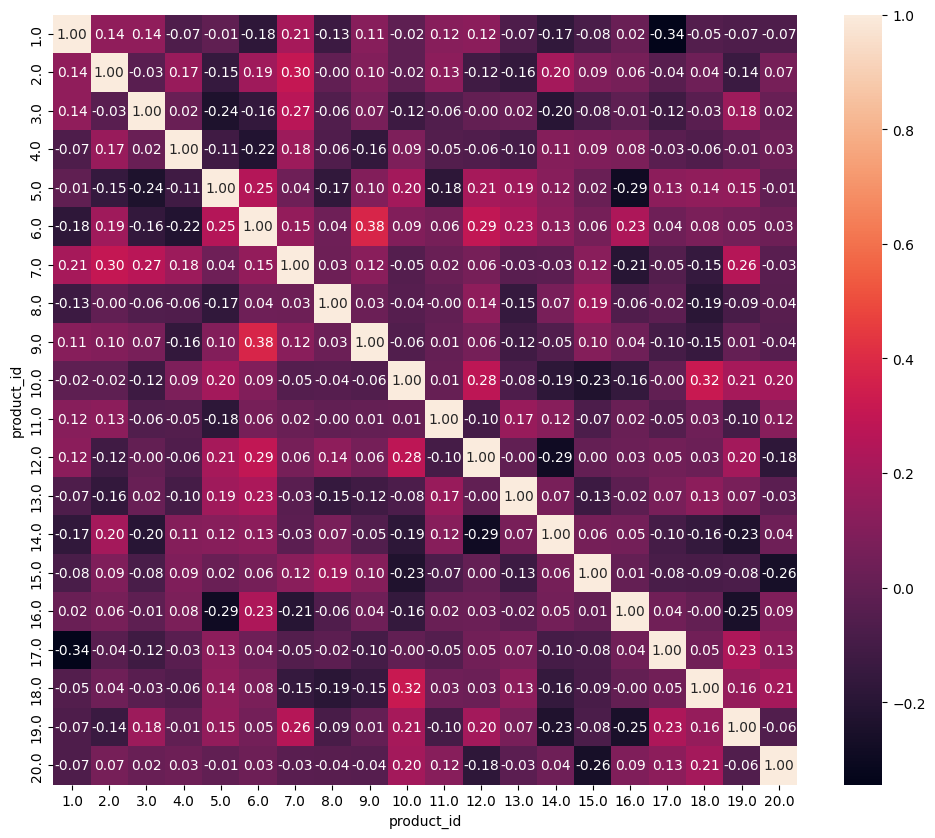

In [133]:
plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot=True, fmt='.2f')

In [136]:
fig = px.scatter_matrix(
    df_m[[1, 17, 6, 9]],
    width = 900,
    height = 700,
    opacity = .5
)
fig.show()

6번이 많이 팔릴때 9번도 많이 팔린다  
17번 판매량이 감소할때 1번 제품 판매량은 증가한다(서로 상극인 제품인듯. 대체제라던가).

고객분석

In [143]:
order_mg.groupby(by='user_id').agg(
    total_spending = ('total_revenue', 'sum'),
    order_cnt = ('order_id', 'count'),
    dist_prod_cnt = ('product_id', 'nunique'),
    dist_cate_cnt = ('category', 'nunique')
).reset_index().describe()

,user_id,total_spending,order_cnt,dist_prod_cnt,dist_cate_cnt
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,750.172984,1123.702274,3.445899,3.161957,2.278429
std,432.415462,793.373641,1.771519,1.577632,0.976805
min,1.000000,26.000000,1.000000,1.000000,1.000000
25%,376.500000,525.000000,2.000000,2.000000,2.000000
50%,750.000000,949.000000,3.000000,3.000000,2.000000
75%,1123.000000,1556.500000,4.000000,4.000000,3.000000
max,1499.000000,5281.000000,10.000000,10.000000,6.000000
